In [1649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Engenering

In [1650]:
df = pd.read_csv('data/spotifydataset.csv')
df_old = df.copy()
df.head(3)

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.00003,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.00000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.00000,0.1760,0.385,84.726


In [1651]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Пропуски

In [1652]:
df['genres'].fillna('UNKNOWN', inplace=True)
df.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1008\1955191895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('UNKNOWN', inplace=True)


artist_name          0
genres               0
followers            0
artist_popularity    0
artist_url           0
track_name           0
album_name           0
release_date         0
duration_ms          0
explicit             0
track_popularity     0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
dtype: int64

In [1653]:
df['genres'].value_counts()

genres
UNKNOWN                                                                                     163
pop                                                                                          40
dance pop, pop                                                                               20
british soul, pop, pop soul, uk pop                                                          10
east coast hip hop, hip hop, rap                                                             10
                                                                                           ... 
japanese teen pop                                                                            10
alt z                                                                                        10
ambient folk, indie folk                                                                     10
atl hip hop, dirty south rap, hip hop, old school atlanta hip hop, rap, southern hip hop     10
social media pop                 

## Cat -> Numbers

**artist**

In [1654]:
df.artist_name.value_counts()

artist_name
A                 106
a                  12
Ariana Grande      10
Adele              10
Arctic Monkeys     10
                 ... 
Aaliyah            10
Gracie Abrams      10
Addison Rae         7
alex_g_offline      4
Ã                   1
Name: count, Length: 92, dtype: int64

In [1655]:
df.artist_url.value_counts()

artist_url
https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR    10
https://open.spotify.com/artist/4dpARuHxo51G3z768sgnrY    10
https://open.spotify.com/artist/13ubrt8QOOCPljQ2FL1Kca    10
https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02    10
https://open.spotify.com/artist/7Ln80lUS6He07XvHI8qqHH    10
                                                          ..
https://open.spotify.com/artist/0VeuhtyLJhzeGV4ht7EstC     1
https://open.spotify.com/artist/1t0QSnG1mYs88ahQmAgeuK     1
https://open.spotify.com/artist/3dkzFPQ0RzpI6jFjPXaqki     1
https://open.spotify.com/artist/1dIc8SElekAIf7zZUc3e1y     1
https://open.spotify.com/artist/5FnG9lLegyiFtLtZG2XLQ4     1
Name: count, Length: 118, dtype: int64

In [1656]:
pd.DataFrame(df[['artist_name', 'artist_url']].value_counts())

count
artist_name artist_url                                               
A           https://open.spotify.com/artist/0vRCGkgJdtoNRJy...     10
            https://open.spotify.com/artist/1jEW6dI75QSGs0O...     10
            https://open.spotify.com/artist/3f9OwgLz4OSqOaY...     10
            https://open.spotify.com/artist/4JHgOJFhRw27P38...     10
            https://open.spotify.com/artist/3HBxYEtI2i43MzW...     10
...                                                               ...
            https://open.spotify.com/artist/1dIc8SElekAIf7z...      1
            https://open.spotify.com/artist/1t0QSnG1mYs88ah...      1
a           https://open.spotify.com/artist/1nKbNw7884Yyv33...      1
            https://open.spotify.com/artist/1e9Md0vofNAvTEu...      1
Ã           https://open.spotify.com/artist/5FnG9lLegyiFtLt...      1

[118 rows x 1 columns]

In [1657]:
df["artist_id"] = df.groupby(["artist_name", "artist_url"]).ngroup() + 1
df.artist_id.value_counts()

artist_id
76     10
40     10
29     10
105    10
74     10
       ..
2       1
11      1
15      1
9       1
117     1
Name: count, Length: 118, dtype: int64

In [1658]:
df.drop(['artist_name', 'artist_url'], axis=1, inplace=True)

**track name**

In [1659]:
df.track_name.value_counts()

track_name
Closer                            2
Chaleya                           2
Jungle                            2
Beautiful                         2
My Boo                            2
                                 ..
Roses                             1
Rosa Parks                        1
B.O.B. - Bombs Over Baghdad       1
Da Art of Storytellin' (Pt. 1)    1
Set Fire to the Rain              1
Name: count, Length: 984, dtype: int64

In [1660]:
def check_dublicates(col):
    counts = df[col].value_counts()
    indexes = counts[counts > 1].index

    return df[df[col].isin(indexes)].sort_values(col)

In [1661]:
check_dublicates('track_name')

,genres,followers,artist_popularity,track_name,album_name,release_date,duration_ms,explicit,track_popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
419,electro house,39210855,73,"Alone, Pt. II",World Of Walker,2021-11-26,179052,False,73,0.673,...,3,-4.493,0,0.0439,0.539000,0.000000,0.1290,0.6280,88.011,48
441,pop,7041802,73,"Alone, Pt. II",World Of Walker,2021-11-26,179052,False,73,0.673,...,3,-4.493,0,0.0439,0.539000,0.000000,0.1290,0.6280,88.011,83
184,dance pop,4816768,70,Beautiful,Freedom,2008-01-01,312986,False,70,0.739,...,0,-4.443,0,0.0881,0.125000,0.000000,0.1120,0.6270,130.018,45
477,"dance pop, pop",8411343,67,Beautiful,Stripped,2002-07-19,238560,False,67,0.456,...,5,-3.866,0,0.0275,0.578000,0.000003,0.1140,0.0992,76.190,90
442,pop,7041802,74,Car Keys (Ayla),Car Keys (Ayla),2023-06-30,147211,False,74,0.719,...,9,-5.290,0,0.1250,0.341000,0.000000,0.2550,0.5220,126.031,83
661,"electro house, pop nacional, slap house",11291607,74,Car Keys (Ayla),Car Keys (Ayla),2023-06-30,147211,False,74,0.719,...,9,-5.290,0,0.1250,0.341000,0.000000,0.2550,0.5220,126.031,60
199,"filmi, modern bollywood",119428689,74,Chaleya,Jawan,2023-09-05,200373,False,74,0.575,...,0,-5.280,1,0.0852,0.393000,0.010700,0.1310,0.4390,95.047,77
734,"desi hip hop, filmi, tamil hip hop",31427977,74,Chaleya,Jawan,2023-09-05,200373,False,74,0.575,...,0,-5.280,1,0.0852,0.393000,0.010700,0.1310,0.4390,95.047,69
127,"electropop, etherpop, indie poptimism, pop",21674751,84,Closer,Closer,2016-07-29,244960,False,84,0.748,...,8,-5.599,1,0.0338,0.414000,0.000000,0.1110,0.6610,95.010,96
769,"dance pop, pop, r&b, urban contemporary",9033803,66,Closer,Year Of The Gentleman (Bonus Track Edition),2008-01-01,234360,False,66,0.711,...,4,-6.461,0,0.0763,0.028000,0.000030,0.1520,0.5900,126.050,100


In [1662]:
df["track_id"] = df.groupby([
    "track_name", "album_name", "duration_ms", "release_date", 
    "energy", "loudness", "mode", "danceability", "speechiness", "tempo"
]).ngroup() + 1
df.track_id.value_counts()

track_id
145    2
138    2
554    2
53     2
262    2
      ..
693    1
692    1
74     1
184    1
384    1
Name: count, Length: 993, dtype: int64

In [1663]:
df.drop(['track_name'], axis=1, inplace=True)

**album name**

In [1664]:
from sklearn.preprocessing import LabelEncoder

In [1665]:
encoder = LabelEncoder()
df['album_name'] = encoder.fit_transform(df['album_name'])

**datatime**

In [1666]:
df['valid_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
df[df['valid_date'].isna()]

,genres,followers,artist_popularity,album_name,release_date,duration_ms,explicit,track_popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id,track_id,valid_date
25,"east coast hip hop, hip hop, rap",14740526,77,288,2013,236280,True,77,0.801,0.819,...,1,0.1580,0.2920,0.000000,0.5150,0.8110,139.969,29,284,NaT
27,"east coast hip hop, hip hop, rap",14740526,76,288,2013,233786,True,76,0.853,0.693,...,1,0.2750,0.0239,0.000000,0.1100,0.6620,95.967,29,277,NaT
28,"east coast hip hop, hip hop, rap",14740526,76,288,2013,220133,True,76,0.597,0.427,...,0,0.0536,0.1800,0.000013,0.1210,0.0997,120.085,29,465,NaT
52,"alternative metal, alternative rock, grunge, h...",5216015,72,270,1994,259200,False,72,0.384,0.561,...,0,0.0296,0.3730,0.253000,0.0775,0.1590,136.136,57,583,NaT
57,"alternative metal, alternative rock, grunge, h...",5216015,64,270,1994,255573,False,64,0.527,0.838,...,1,0.0323,0.0206,0.000620,0.0700,0.7210,117.454,57,572,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,"album rock, classic rock, folk rock, mellow go...",1779973,58,49,1972,181093,False,58,0.696,0.522,...,0,0.0394,0.6850,0.193000,0.1660,0.8810,156.488,64,684,NaT
893,"album rock, classic rock, folk rock, mellow go...",1779973,56,49,1972,183186,False,56,0.529,0.472,...,1,0.0267,0.5830,0.000000,0.1290,0.2500,134.100,64,394,NaT
990,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,84,442,2003,235213,False,84,0.727,0.974,...,0,0.0664,0.1030,0.000532,0.1740,0.9650,79.526,102,368,NaT
993,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,71,442,2003,234000,True,71,0.871,0.597,...,0,0.0464,0.1260,0.000113,0.0638,0.6350,125.999,102,832,NaT


In [1667]:
df['valid_date'] = df['valid_date'].fillna(pd.to_datetime(df['release_date'].astype(str) + '-01-01'))

C:\Users\User\AppData\Local\Temp\ipykernel_1008\3073819352.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['valid_date'] = df['valid_date'].fillna(pd.to_datetime(df['release_date'].astype(str) + '-01-01'))
C:\Users\User\AppData\Local\Temp\ipykernel_1008\3073819352.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['valid_date'] = df['valid_date'].fillna(pd.to_datetime(df['release_date'].astype(str) + '-01-01'))
C:\Users\User\AppData\Local\Temp\ipykernel_1008\3073819352.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and w

In [1668]:
df['year'] = df['valid_date'].dt.year
df['month'] = df['valid_date'].dt.month
df['day'] = df['valid_date'].dt.day

In [1669]:
df.drop(['valid_date', 'release_date'], axis=1, inplace=True)

In [1670]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

**genres**

In [1671]:
df.genres.value_counts()

genres
UNKNOWN                                                                                     163
pop                                                                                          40
dance pop, pop                                                                               20
british soul, pop, pop soul, uk pop                                                          10
east coast hip hop, hip hop, rap                                                             10
                                                                                           ... 
japanese teen pop                                                                            10
alt z                                                                                        10
ambient folk, indie folk                                                                     10
atl hip hop, dirty south rap, hip hop, old school atlanta hip hop, rap, southern hip hop     10
social media pop                 

In [1672]:
all_genres = set()
df['genres'].str.split(', ').apply(lambda x: all_genres.update(x) if isinstance(x, list) else None)
all_genres

{'UNKNOWN',
 'afrobeats',
 'album rock',
 'alt z',
 'alternative hip hop',
 'alternative metal',
 'alternative rock',
 'ambient',
 'ambient folk',
 'art pop',
 'atl hip hop',
 'atl trap',
 'australian rock',
 'bachata',
 'bachata dominicana',
 'banda',
 'baroque',
 'big room',
 'braindance',
 'british alternative rock',
 'british soul',
 'canadian contemporary r&b',
 'canadian pop',
 'canadian singer-songwriter',
 'candy pop',
 'chamber pop',
 'classic rock',
 'classical',
 'classical era',
 'conscious hip hop',
 'contemporary country',
 'contemporary r&b',
 'corrido',
 'country',
 'country road',
 'country rock',
 'countrygaze',
 'dance pop',
 'dembow',
 'desi hip hop',
 'detroit rock',
 'dirty south rap',
 'dream pop',
 'dreamo',
 'drumless hip hop',
 'dutch house',
 'dutch trance',
 'early music',
 'east coast hip hop',
 'edm',
 'electro house',
 'electronica',
 'electropop',
 'escape room',
 'etherpop',
 'europop',
 'filmi',
 'folk rock',
 'funk pop',
 'funk rj',
 'gangster rap',
 

In [1673]:
len(all_genres)

156

In [1674]:
for genre in sorted(all_genres):
    df[f'genre_{genre}'] = df['genres'].str.contains(genre).astype(int)

df.drop('genres', axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1008\2484843383.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'genre_{genre}'] = df['genres'].str.contains(genre).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_1008\2484843383.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'genre_{genre}'] = df['genres'].str.contains(genre).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_1008\2484843383.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [1675]:
df.dtypes

followers                   int64
artist_popularity           int64
album_name                  int64
duration_ms                 int64
explicit                     bool
                            ...  
genre_uk pop                int64
genre_urban contemporary    int64
genre_urbano latino         int64
genre_viral pop             int64
genre_west coast rap        int64
Length: 180, dtype: object

## Корреляция

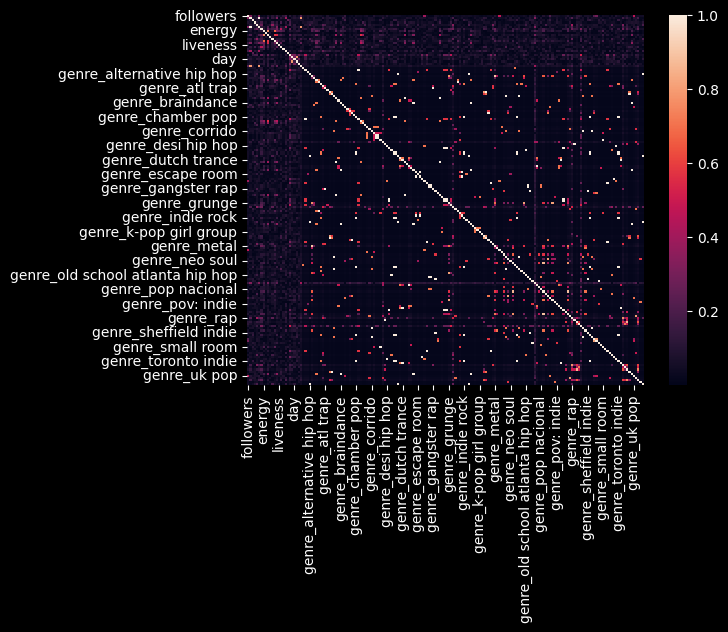

In [1676]:
sns.heatmap(np.abs(df.corr()))
plt.show()

In [1677]:
cols = df.columns
for i in range(len(cols)):
    for col in df.columns:
        if col != cols[i]:
            val = df[cols[i]].corr(df[col])
            if np.abs(val) > 0.95:
                print(f'{col} <---> {cols[i]} : {val}')
                df.drop(cols[i], axis=1, inplace=True)
                break

track_popularity <---> artist_popularity : 1.0
genre_classic rock <---> genre_album rock : 1.0
genre_drumless hip hop <---> genre_alternative hip hop : 0.9999999999999999
genre_indie folk <---> genre_ambient folk : 1.0
genre_gangster rap <---> genre_atl trap : 1.0
genre_latin pop <---> genre_bachata : 1.0
genre_tropical <---> genre_bachata dominicana : 1.0
genre_musica mexicana <---> genre_banda : 1.0
genre_early music <---> genre_baroque : 1.0
genre_electronica <---> genre_braindance : 1.0
genre_lilith <---> genre_canadian singer-songwriter : 1.0
genre_dream pop <---> genre_chamber pop : 0.9999999999999999
genre_sad sierreno <---> genre_corrido : 1.0
genre_country rock <---> genre_country road : 1.0
genre_small room <---> genre_countrygaze : 1.0
genre_rap dominicano <---> genre_dembow : 1.0
genre_tamil hip hop <---> genre_desi hip hop : 1.0
genre_glam metal <---> genre_detroit rock : 0.9999999999999999
genre_old school atlanta hip hop <---> genre_dirty south rap : 0.9999999999999999
g

## Скейлинг

In [1678]:
from sklearn.preprocessing import StandardScaler

In [1679]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Кластеризация

## K-means

In [1680]:
from sklearn.cluster import KMeans

### Метод локтя

In [1681]:
inertia = []
k_vals = np.arange(1, 200)
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

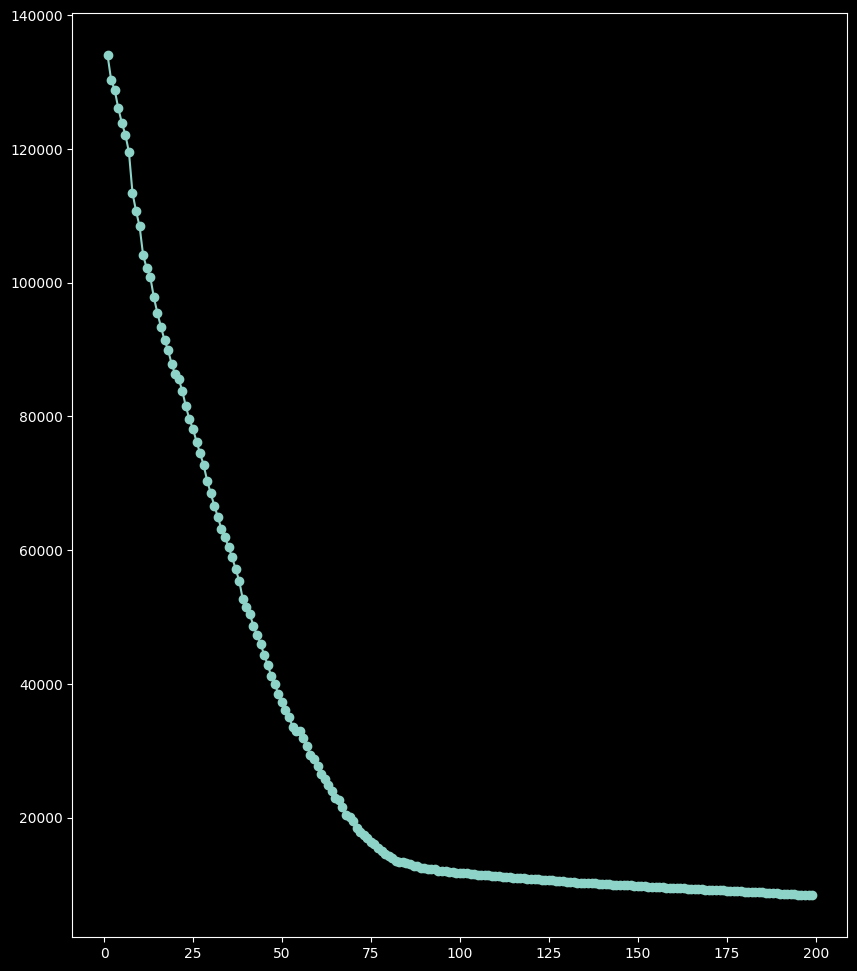

In [1682]:
plt.figure(figsize=(10, 12))
plt.plot(k_vals, inertia, marker='o')
plt.show()

### Модель

In [1833]:
K = 80

In [1834]:
kmeans = KMeans(n_clusters=K, random_state=0)
clusters = kmeans.fit_predict(df)
df_old['cluster'] = clusters

### PCA и t-SNE

In [1835]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [1836]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df)

In [1837]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
x_tsne = tsne.fit_transform(df)

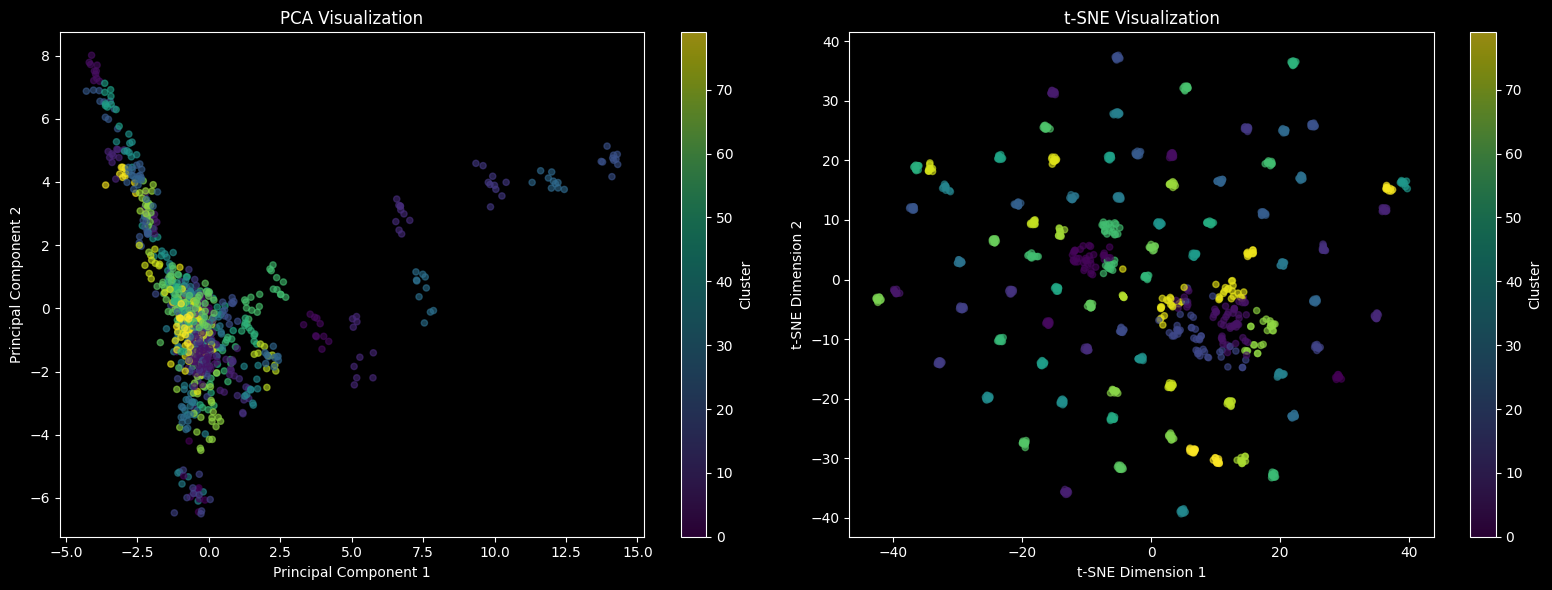

In [1838]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
scatter_pca = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter_pca, label='Cluster')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
scatter_tsne = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter_tsne, label='Cluster')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

### Метрики

In [1839]:
from sklearn.metrics import silhouette_score

In [1840]:
score = silhouette_score(df, df_old['cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.47


### Силуэтный график

In [1841]:
from sklearn.metrics import silhouette_samples

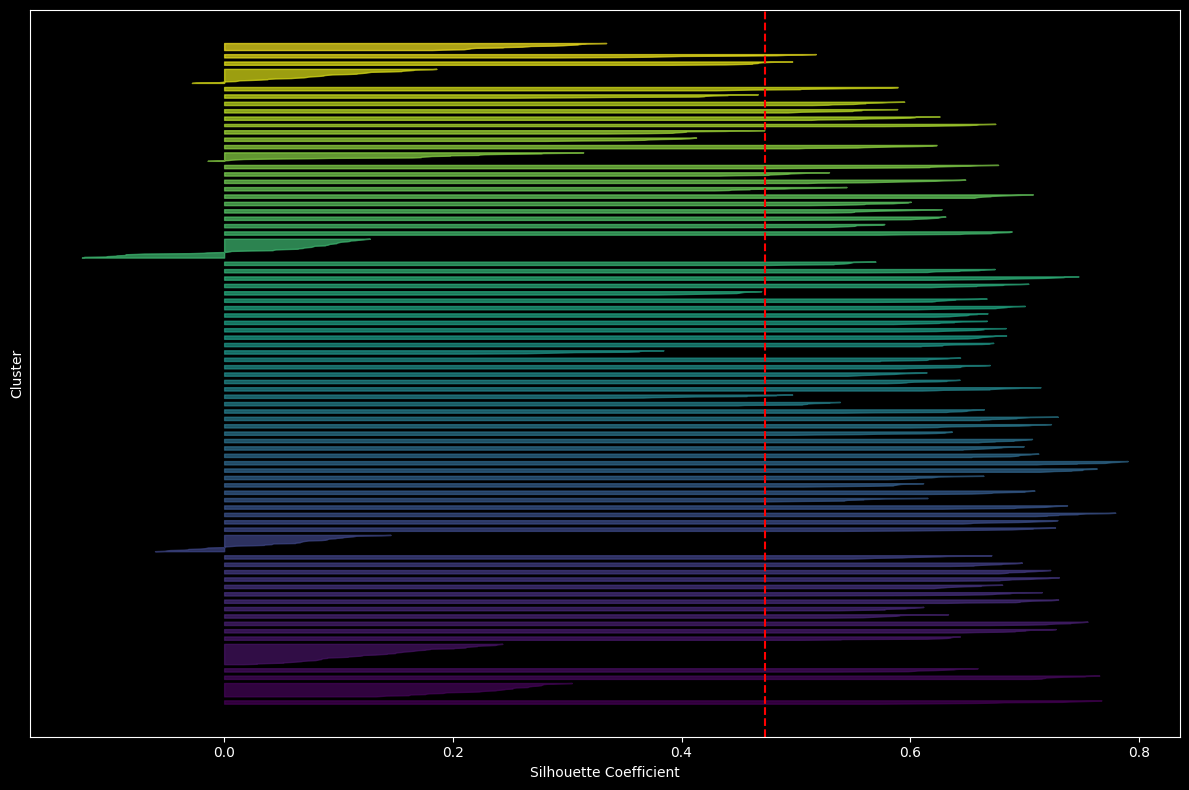

In [1842]:
plt.figure(figsize=(12, 8))

score = silhouette_score(df, clusters)
sample_silhouette_values = silhouette_samples(df, clusters)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / K)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=score, color="red", linestyle="--")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

plt.yticks([])  

plt.tight_layout()
plt.show()

## DBSCAN

In [1881]:
K = 15

In [1882]:
from sklearn.neighbors import NearestNeighbors

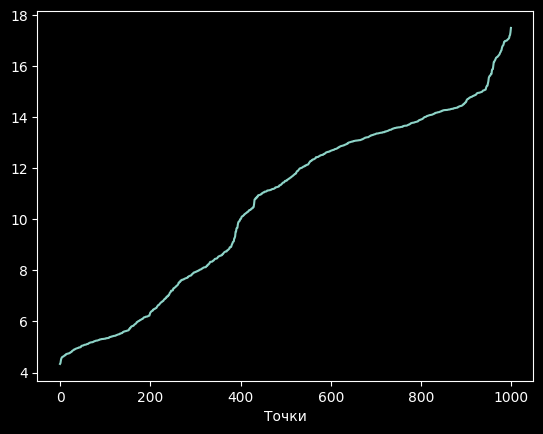

In [1883]:
nn = NearestNeighbors(n_neighbors=K).fit(df)
distances, _ = nn.kneighbors(df)
distances = np.sort(distances[:, -1], axis=0)

plt.plot(distances)
plt.xlabel('Точки')
plt.show()

In [1884]:
from sklearn.cluster import DBSCAN

In [1885]:
eps = 10
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df)

df_old['cluster'] = clusters

### PCA

In [1886]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df)

In [1887]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
x_tsne = tsne.fit_transform(df)

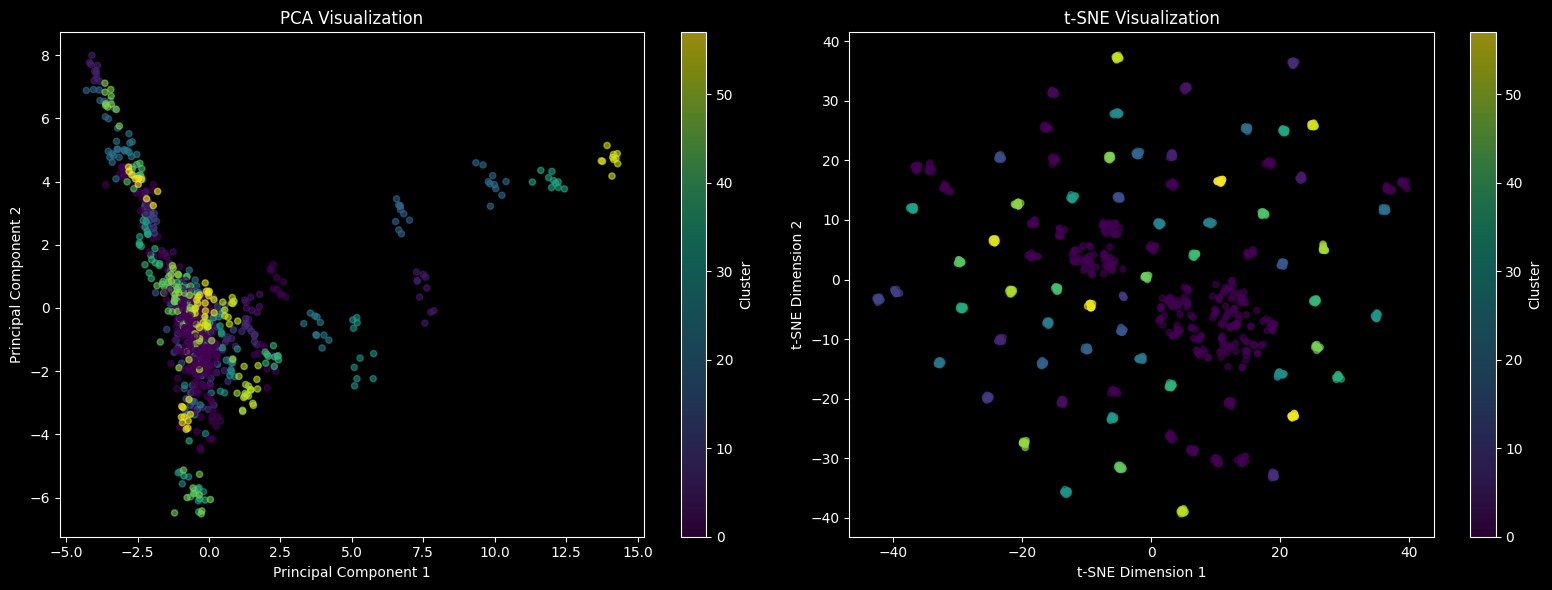

In [1888]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
scatter_pca = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter_pca, label='Cluster')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
scatter_tsne = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter_tsne, label='Cluster')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

### Метрики

In [1889]:
score = silhouette_score(df, df_old['cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.47


### Силуэтный график

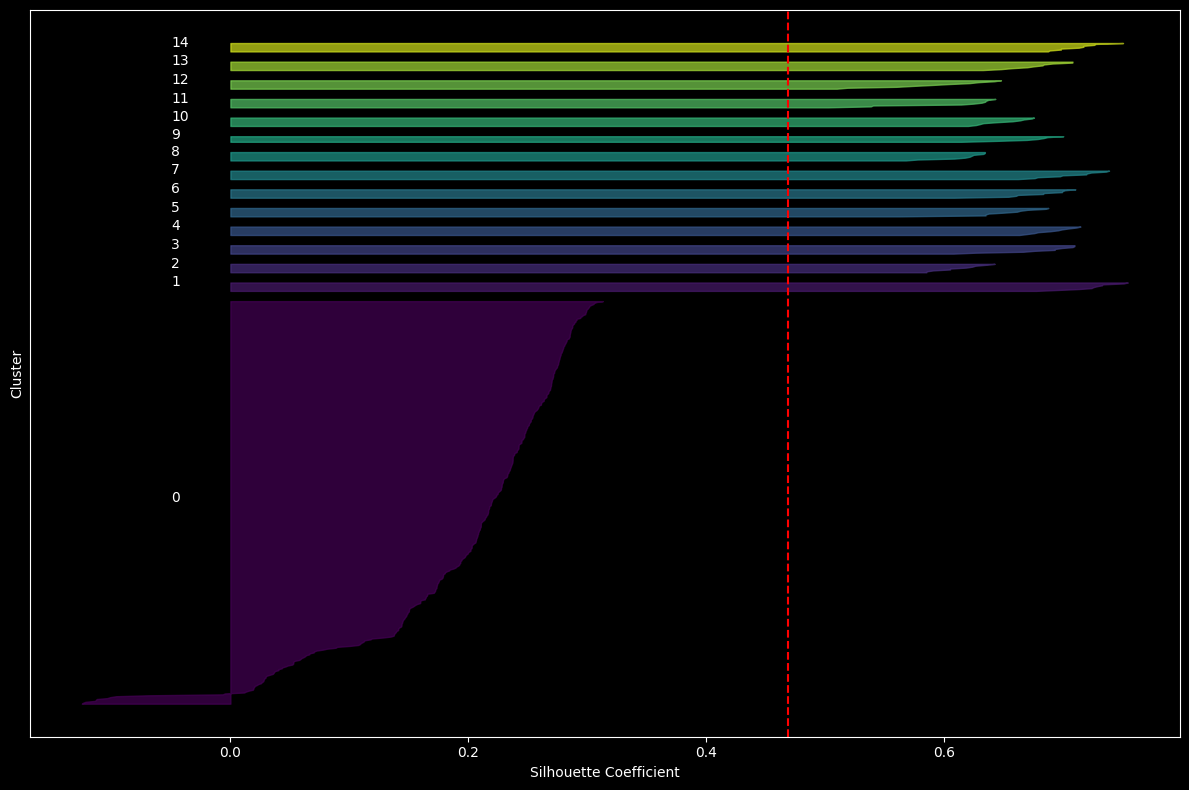

In [1890]:
plt.figure(figsize=(12, 8))

score = silhouette_score(df, clusters)
sample_silhouette_values = silhouette_samples(df, clusters)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / K)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=score, color="red", linestyle="--")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

plt.yticks([])  

plt.tight_layout()
plt.show()